# Bank Customer Churn Dataset

This dataset is for ABC Multistate bank with following columns:

- customer_id, unused variable.
- credit_score, used as input.
- country, used as input.
- gender, used as input.
- age, used as input.
- tenure, used as input.
- balance, used as input.
- products_number, used as input.
- credit_card, used as input.
- active_member, used as input.
- estimated_salary, used as input.
- churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

Aim is to Predict the Customer Churn for ABC Bank.

In [1]:
import pandas as pd

df = pd.read_csv("Bank Customer Churn Prediction.csv")

## Data Validation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print(df["customer_id"].duplicated().any())

False


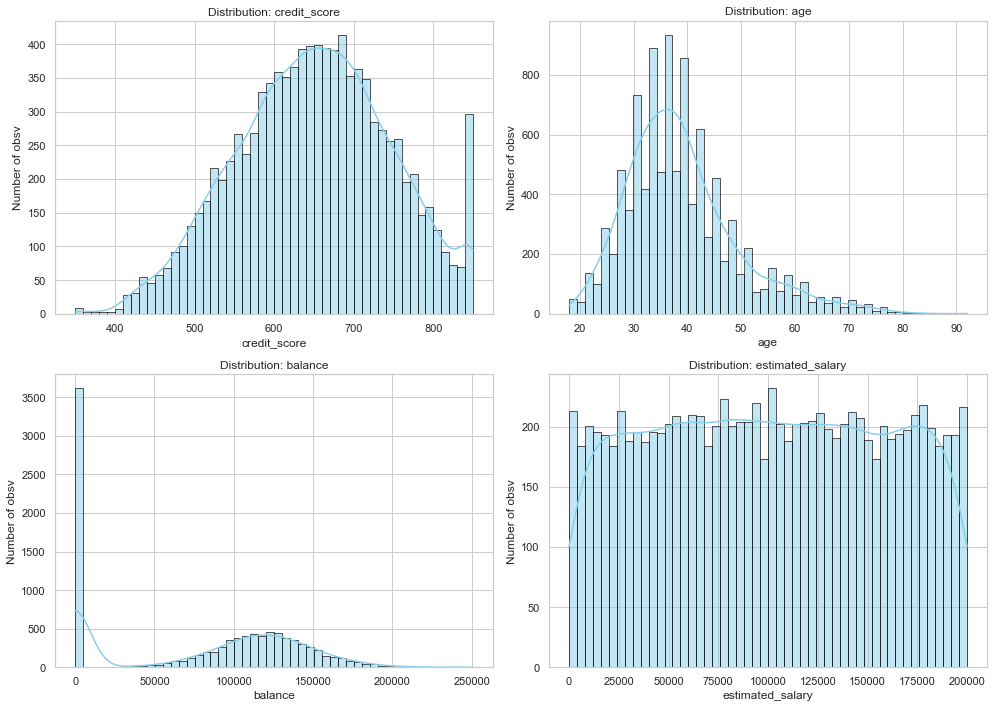

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ["credit_score", "age", "balance", "estimated_salary"]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=50, color="skyblue", edgecolor="black")
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Number of obsv")

plt.tight_layout()
plt.show()

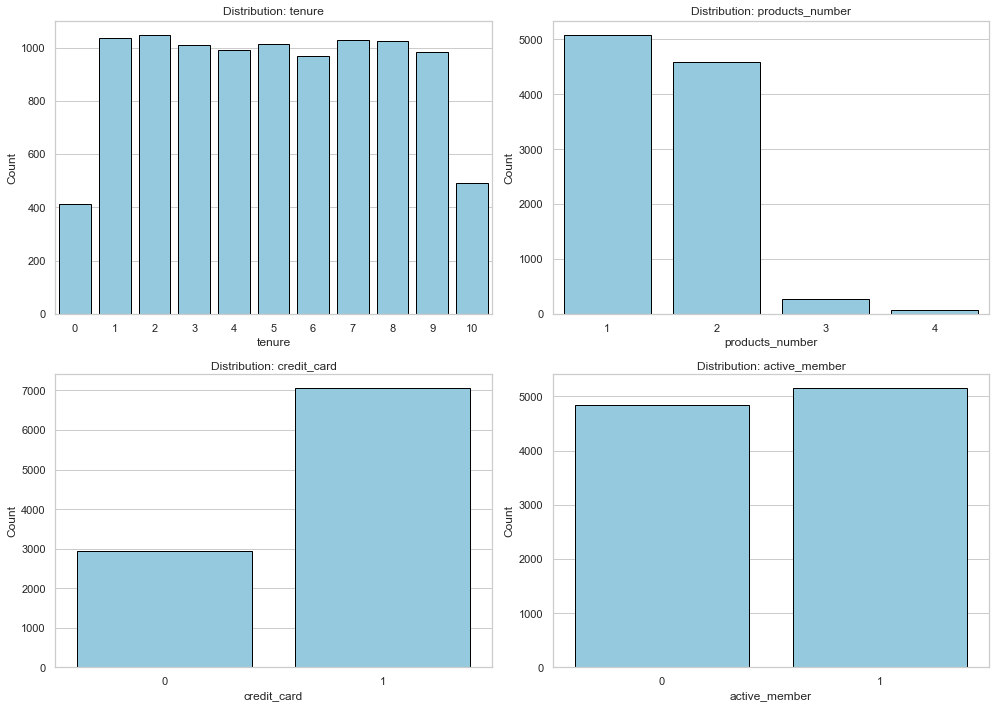

In [7]:
int_columns = ["tenure", "products_number", "credit_card", "active_member"]

sns.set(style="whitegrid")

plt.figure(figsize=(14, 10))

for i, col in enumerate(int_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], color="skyblue", edgecolor="black")
    plt.title(f"Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

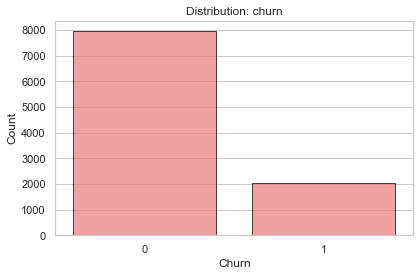

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["churn"], color="#ff6666", alpha=0.7, edgecolor="black")
plt.title("Distribution: churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Exploratory Analysis

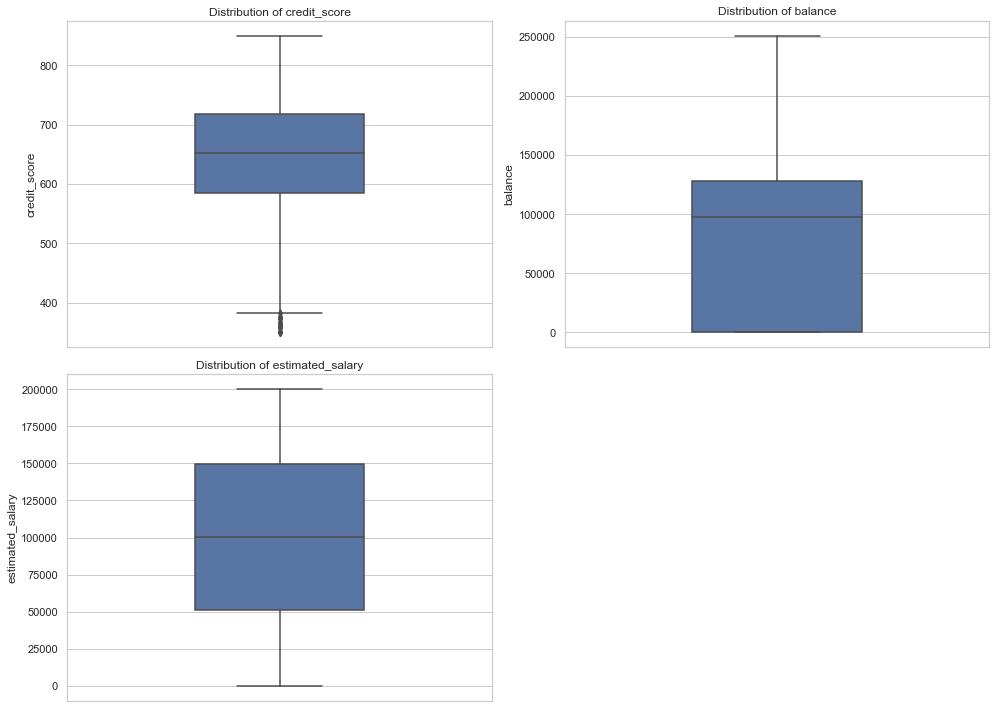

In [9]:
variables = ["credit_score", "balance", "estimated_salary"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 

for ax, var in zip(axes.flatten()[:3], variables):
    sns.boxplot(data=df, y=var, ax=ax, width=0.4)
    ax.set_title(f"Distribution of {var}")
    ax.set_ylabel(var)

axes.flatten()[3].axis("off")

plt.tight_layout()
plt.show()

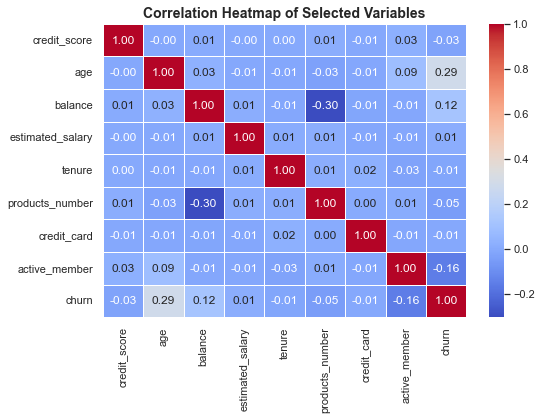

In [10]:
selected_vars =  ["credit_score", "age", "balance", "estimated_salary", "tenure", "products_number", "credit_card", "active_member", "churn"]

corr = df[selected_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Selected Variables", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

- Most correlations close to zero
- Strongest correlation: –0.30 between balance and products_number
- 0.29 correlation between age and churn

## Model Development

Model A

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Features and target
features = ["credit_score", "age", "balance", "estimated_salary", "tenure", "products_number", "credit_card", "active_member"]
X = df[features]
y = df["churn"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Epoch 1/100


400/400 [==============================] - 2s 3ms/step - loss: 0.5788 - accuracy: 0.7058 - val_loss: 0.4432 - val_accuracy: 0.8106
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8213 - val_loss: 0.4026 - val_accuracy: 0.8325
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8380 - val_loss: 0.3873 - val_accuracy: 0.8338
Epoch 4/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8462 - val_loss: 0.3724 - val_accuracy: 0.8438
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8509 - val_loss: 0.3630 - val_accuracy: 0.8506
Epoch 6/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8533 - val_loss: 0.3591 - val_accuracy: 0.8500
Epoch 7/100
400/400 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8555 - val_loss: 0.3575 - val_accuracy: 0.

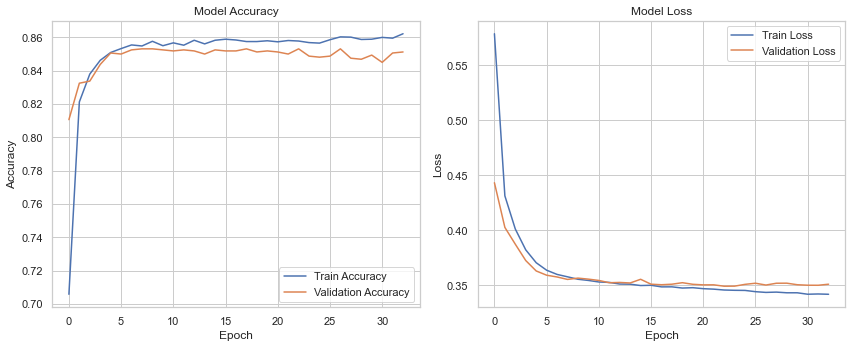

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model B

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Features and target
X = df[features]
y = df["churn"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
model = Sequential()
model.add(Dense(12, activation="relu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Epoch 1/100
400/400 [==============================] - 3s 3ms/step - loss: 0.5406 - accuracy: 0.7667 - val_loss: 0.4733 - val_accuracy: 0.7931
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7934 - val_loss: 0.4520 - val_accuracy: 0.8012
Epoch 3/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7933 - val_loss: 0.4399 - val_accuracy: 0.8062
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7969 - val_loss: 0.4304 - val_accuracy: 0.8106
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4484 - accuracy: 0.8036 - val_loss: 0.4217 - val_accuracy: 0.8156
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4438 - accuracy: 0.8039 - val_loss: 0.4121 - val_accuracy: 0.8244
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8156 - val_loss: 0.4010 - val_accuracy: 0.8375

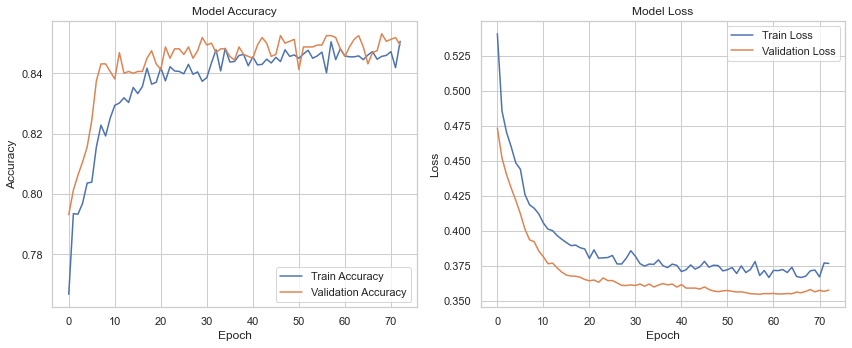

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model C

In [22]:
# Add the new features to the DataFrame
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['under_30', '30_50', 'above_50'])
df['credit_score_category'] = pd.cut(df['credit_score'], bins=[0, 400, 600, 750, 850], labels=['poor', 'fair', 'good', 'excellent'])

# Update the numerical features list to include the new features
numerical_features = [
    "credit_score", "age", "tenure", "balance", "products_number", "credit_card", "active_member", "estimated_salary"
]

categorical_features = ["country", "gender", "age_group", "credit_score_category"]

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [23]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Features and target
X = preprocessor.fit_transform(df)
y = df["churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Neural network
model = Sequential()
model.add(Dense(64,
                activation="relu",
                kernel_regularizer=l2(2e-4),
                input_shape=(X_train_sm.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

model.add(Dense(32,
                activation="relu",
                kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32,
                activation="relu",
                kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(16,
                activation="relu",
                kernel_regularizer=l2(2e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

# Compile
model.compile(
    optimizer=Adam(learning_rate=5e-4, weight_decay=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)

# Train
history = model.fit(
    X_train_sm, y_train_sm,
    epochs=300,  
    batch_size=64,  
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Predict probabilities
y_pred_prob = model.predict(X_test).flatten()

# Metrics for different thresholds
for threshold in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_pred = (y_pred_prob > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))

Epoch 1/300
160/160 [==============================] - 6s 8ms/step - loss: 0.7885 - accuracy: 0.5472 - val_loss: 0.7807 - val_accuracy: 0.3591 - lr: 5.0000e-04
Epoch 2/300
160/160 [==============================] - 1s 5ms/step - loss: 0.7272 - accuracy: 0.5838 - val_loss: 0.7688 - val_accuracy: 0.4761 - lr: 5.0000e-04
Epoch 3/300
160/160 [==============================] - 1s 6ms/step - loss: 0.6872 - accuracy: 0.6212 - val_loss: 0.7719 - val_accuracy: 0.5133 - lr: 5.0000e-04
Epoch 4/300
160/160 [==============================] - 1s 6ms/step - loss: 0.6695 - accuracy: 0.6399 - val_loss: 0.7538 - val_accuracy: 0.5612 - lr: 5.0000e-04
Epoch 5/300
160/160 [==============================] - 1s 6ms/step - loss: 0.6501 - accuracy: 0.6715 - val_loss: 0.7512 - val_accuracy: 0.5765 - lr: 5.0000e-04
Epoch 6/300
160/160 [==============================] - 1s 7ms/step - loss: 0.6356 - accuracy: 0.6784 - val_loss: 0.7334 - val_accuracy: 0.5965 - lr: 5.0000e-04
Epoch 7/300
160/160 [===================

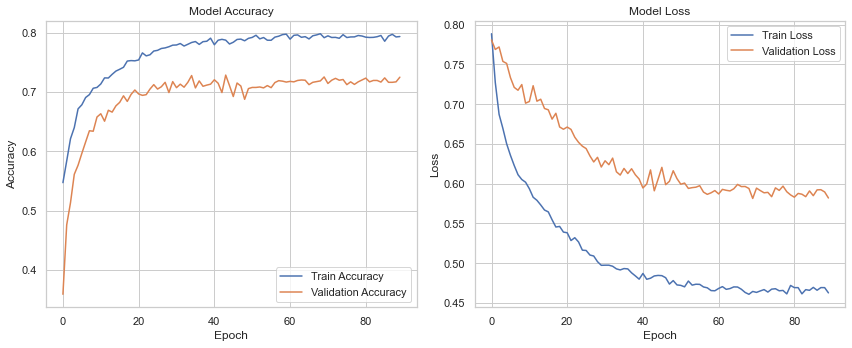

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model D

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Features and target
X = preprocessor.fit_transform(df)
y = df["churn"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initial XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Grid search forcing single‐process to avoid TerminatedWorkerError
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=1           
)


# Fit
try:
    grid.fit(X_train_sm, y_train_sm)
except Exception as e:
    print("GridSearch failed with n_jobs=1, retrying with threading:", e)
    with parallel_backend('threading', n_jobs=4):
        grid.fit(X_train_sm, y_train_sm)

# Best model
best_xgb = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predict probabilities
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate for different thresholds
for threshold in [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8]:
    y_pred = (y_pred_prob > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END c

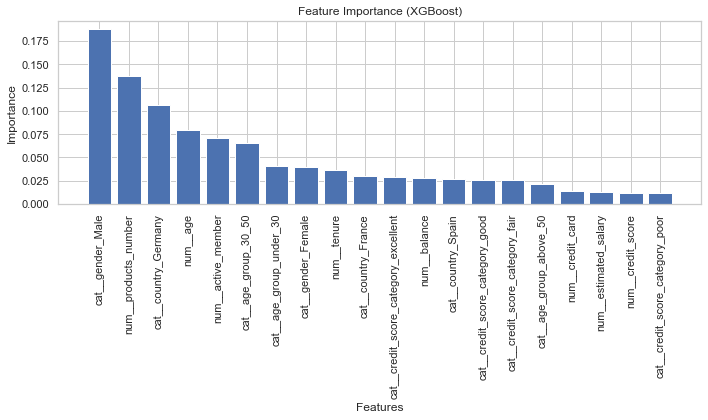

In [26]:
import numpy as np

# Feature importances from the best model
importances = best_xgb.feature_importances_

# Feature names
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

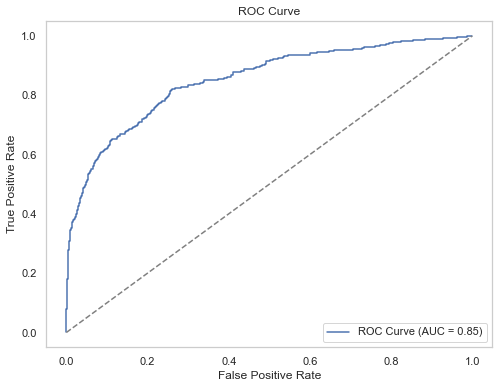

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

The ROC curve demonstrates that the model has good discriminative ability, with an AUC score of 0.85. This indicates that the model is able to distinguish between churn and non churn with high degree of accuracy.



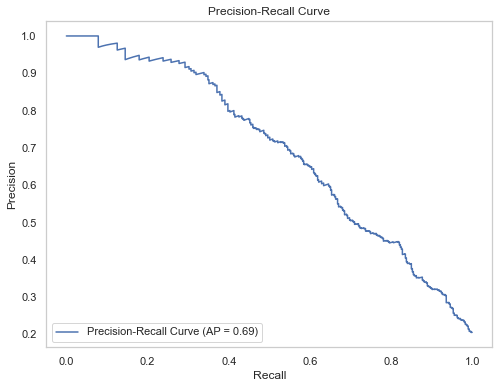

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()

The model’s precision–recall curve (AP = 0.69) shows that it maintains high precision at low recall but precision steadily falls as recall increases, indicating a trade-off: to capture more positives you incur more false positives. Overall, an average precision of 0.64 suggests moderate ability to distinguish churners from non-churners.


## Model Evaluation

To evaluate the performance of the models, appropriate methods for binary classification were used, including accuracy, precision, recall, F1-score, and the ROC curve (AUC score).

The two models compared were:
- Artificial Neural Network (ANN)
- XGBoost Classifier

**Performance Comparison**

Artificial Neural Network (3C):
- Threshold: 0.7
- Accuracy: ~0.87
- Precision: ~0.78
- Recall: ~0.50
- F1: ~0.61



XGBoost Classifier:
- Threshold: ~0.55
- Accuracy: ~0.86
- Precision: ~0.71
- Recall: ~0.53
- F1: ~0.61